In [2]:
# Author: Shreyas Shashikant Vaishnav
# Purpose: Support Vector Machine
# Dataset: Salary_Data_Test

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
salary = pd.read_csv(r"D:\Resume\Data Science\Assignments_SV\Data Science Assignment\Support Vector Machines\SalaryData_Test.csv")
salary.head(4)

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   

           occupation relationship    race    sex  capitalgain  capitalloss  \
0   Machine-op-inspct    Own-child   Black   Male            0            0   
1     Farming-fishing      Husband   White   Male            0            0   
2     Protective-serv      Husband   White   Male            0            0   
3   Machine-op-inspct      Husband   Black   Male         7688            0   

   hoursperweek          native  Salary  
0            40   United-States   <=50K  
1            50   United-States   <=50K  
2            40   United-States    >50K  
3            40   United-States    >50K

Shape of your Data Set loaded: (15060, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    14 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 15
Time to run AutoViz = 8 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


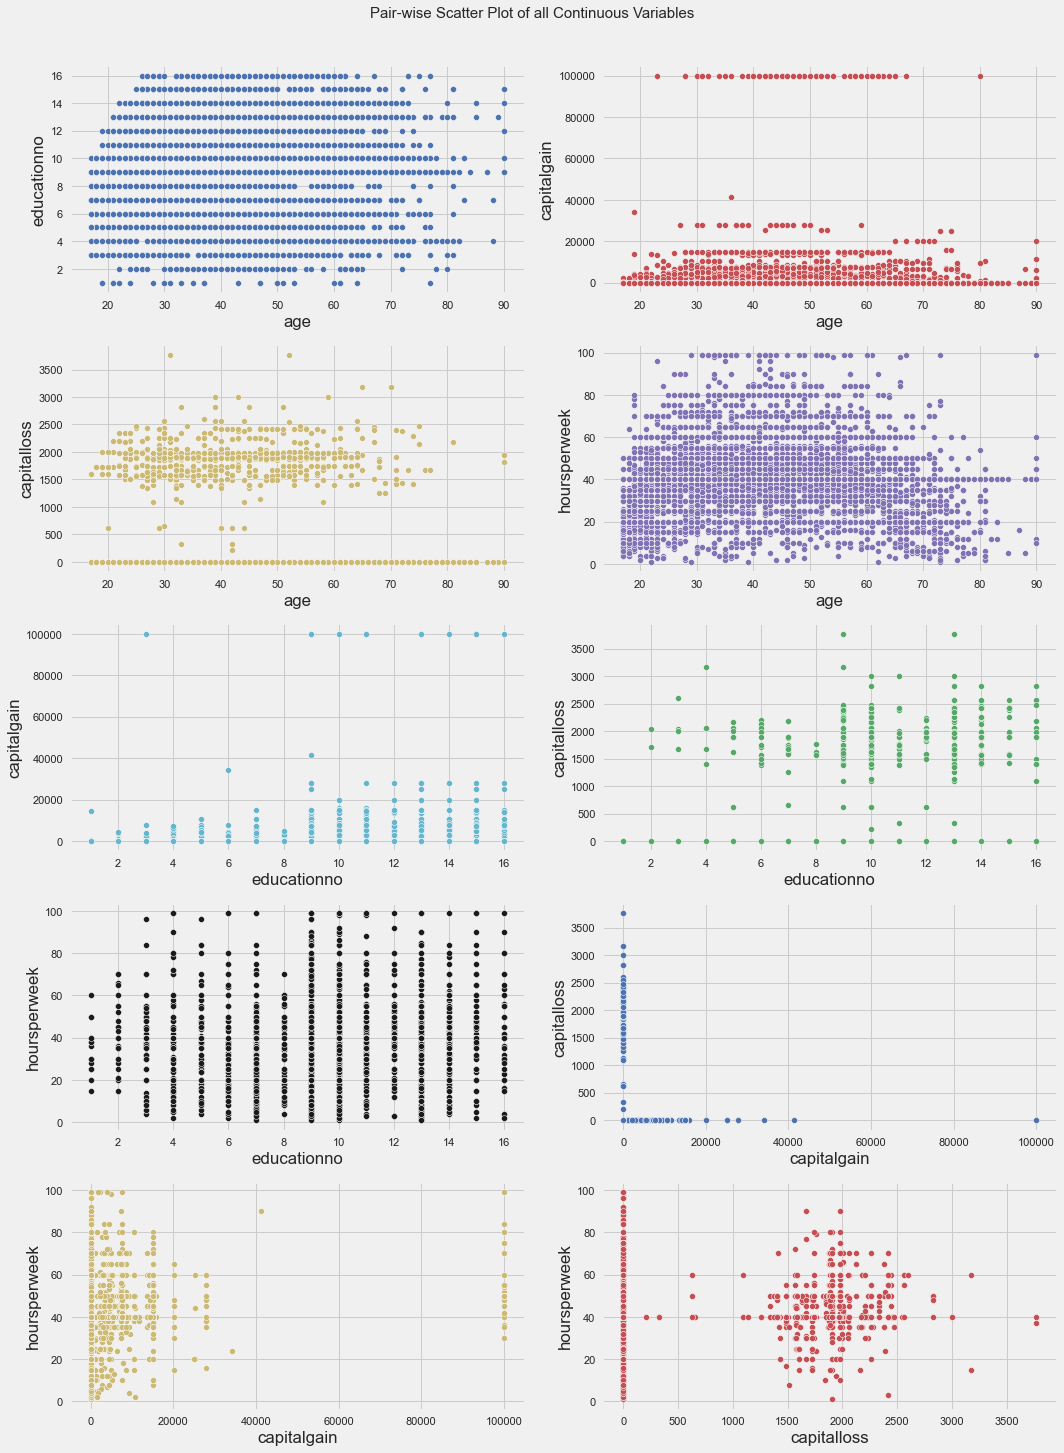

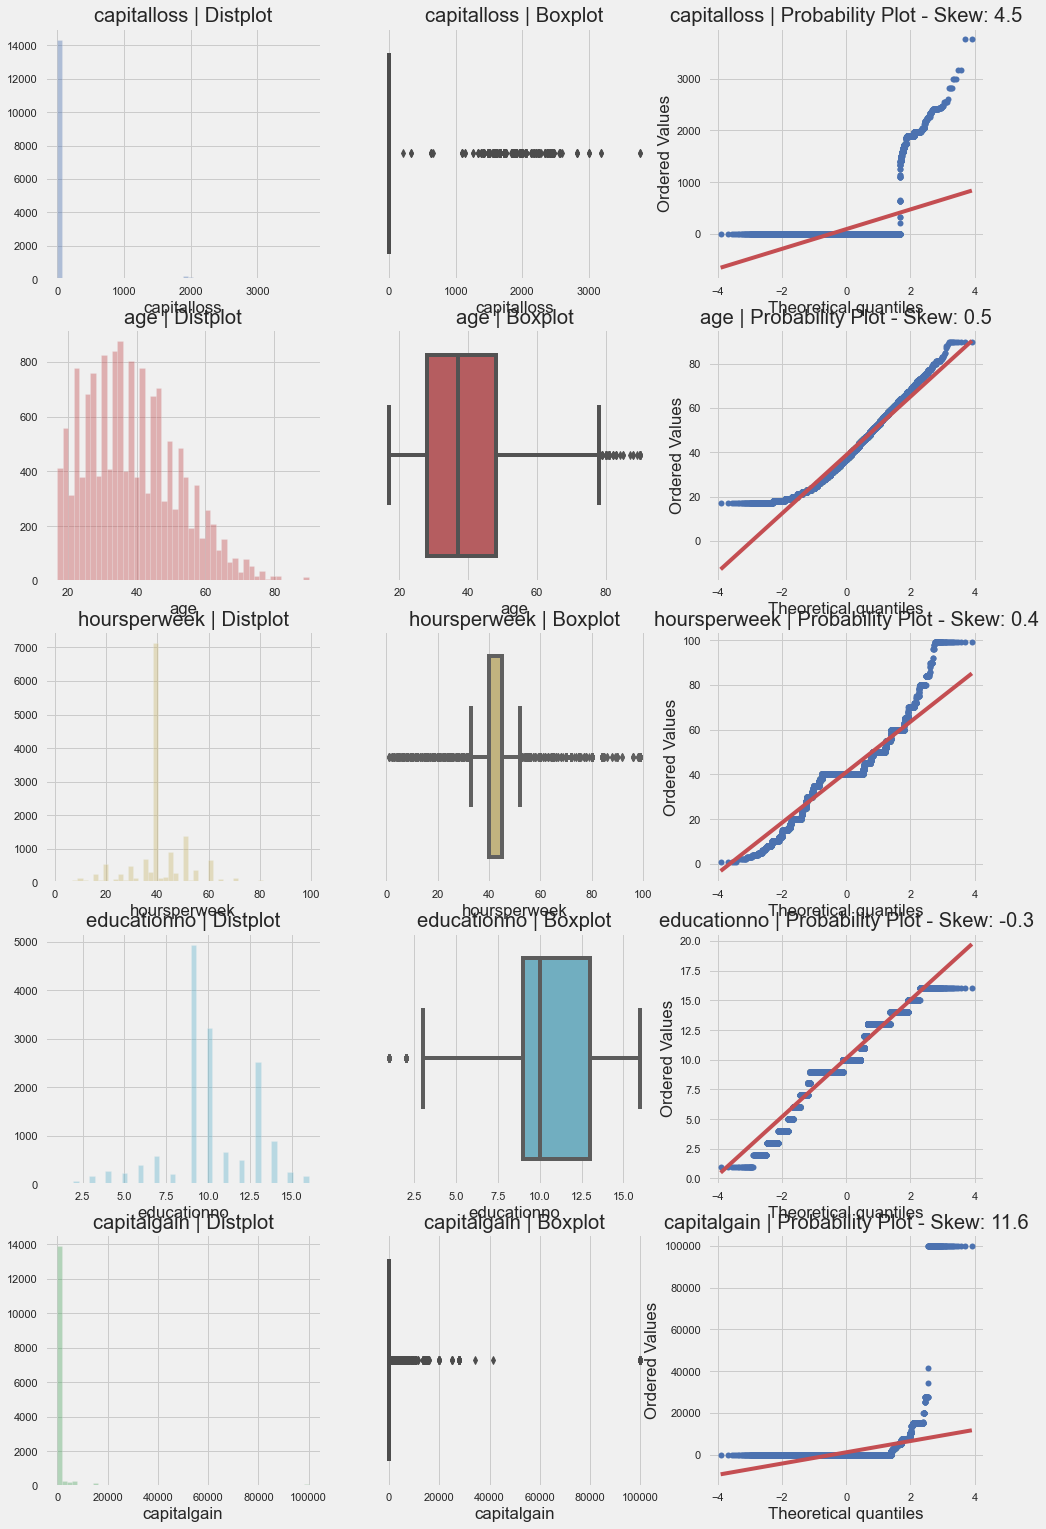

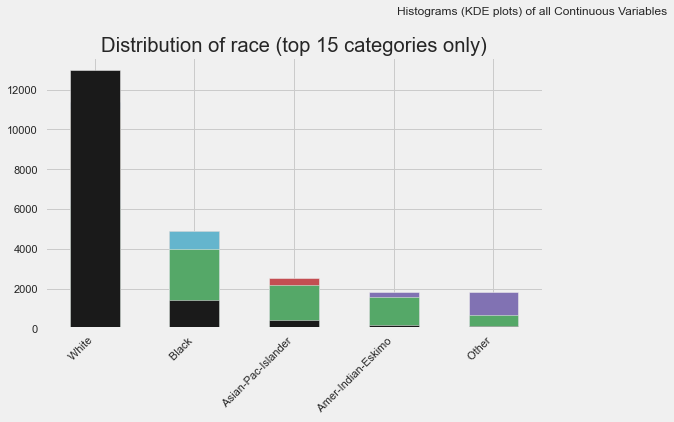

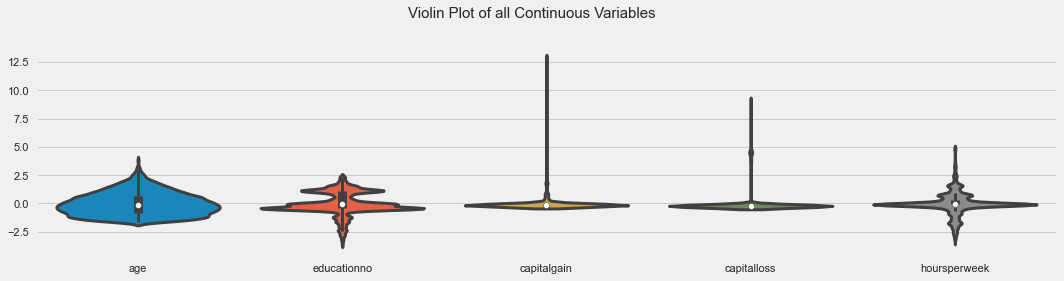

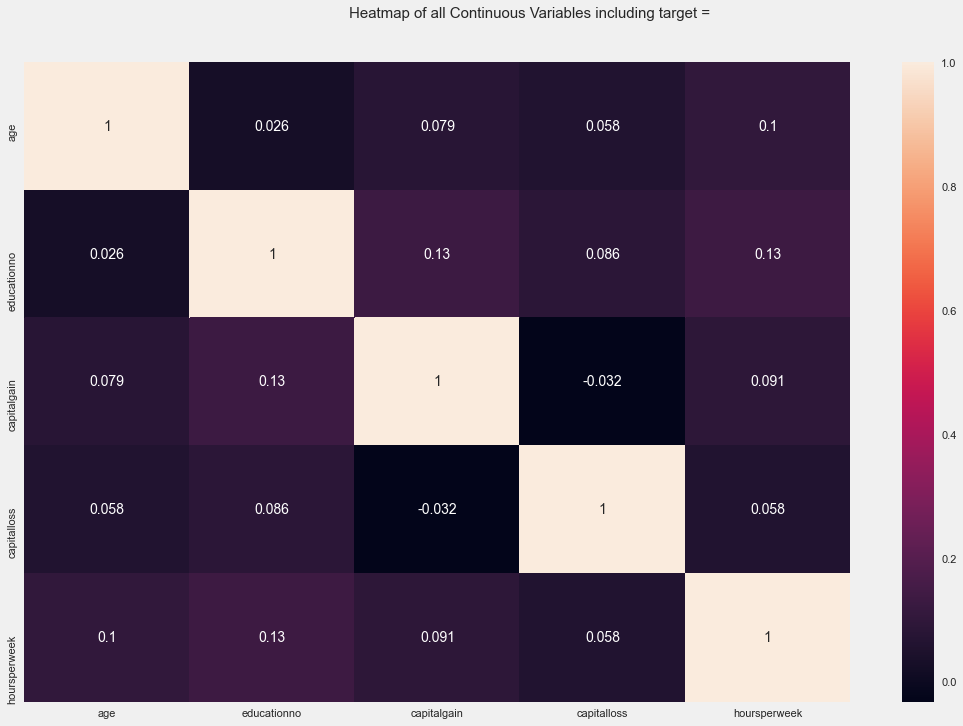

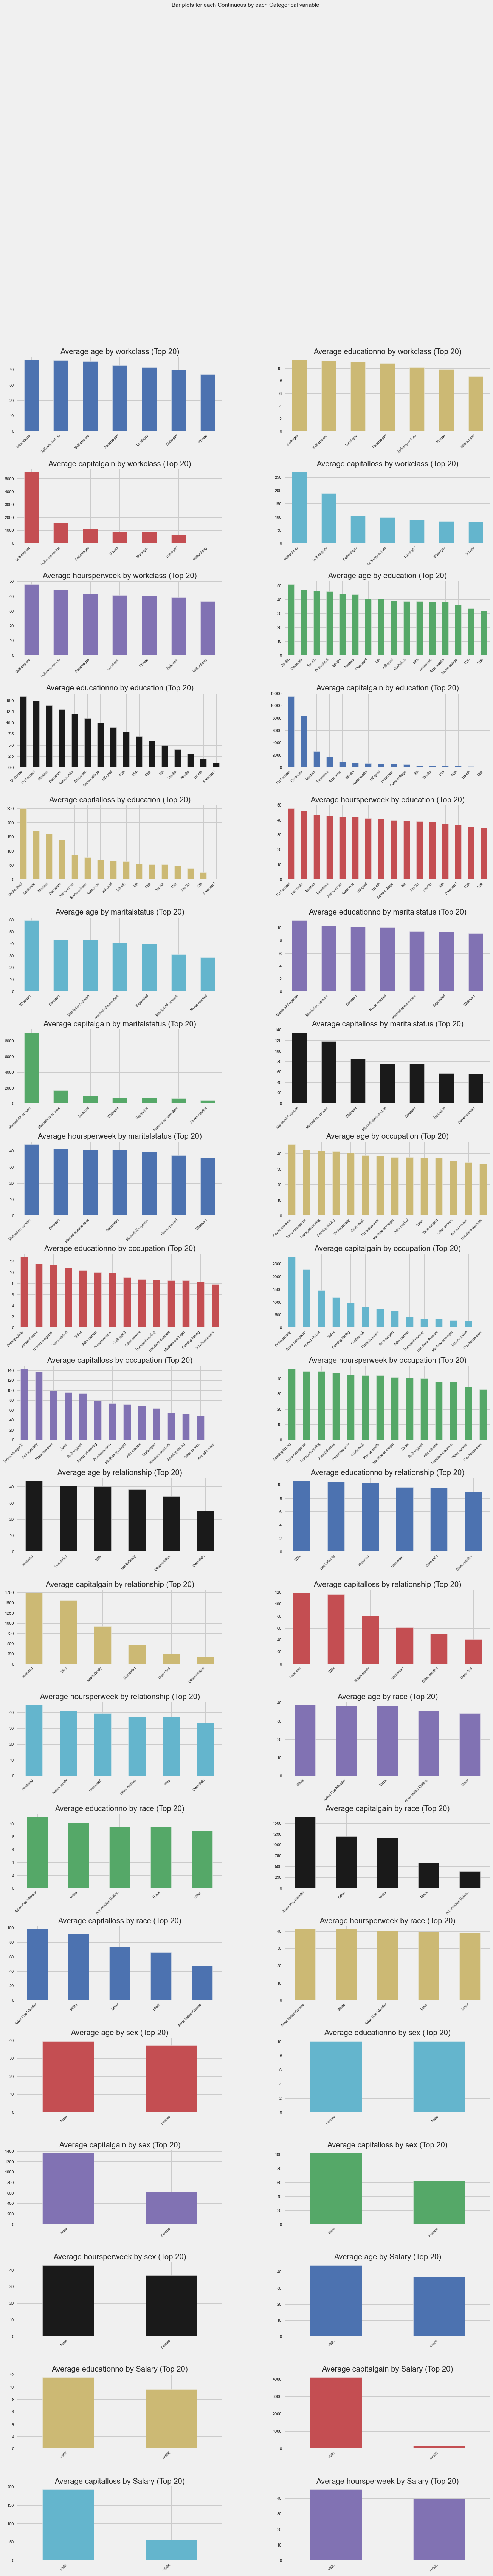

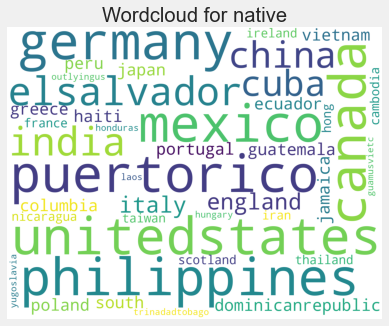

In [42]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz(r"D:\Resume\Data Science\Assignments_SV\Data Science Assignment\Support Vector Machines\SalaryData_Test.csv")

In [5]:
salary.corr()

age  educationno  capitalgain  capitalloss  hoursperweek
age           1.000000     0.026123     0.078760     0.057745      0.102758
educationno   0.026123     1.000000     0.131750     0.085817      0.133691
capitalgain   0.078760     0.131750     1.000000    -0.031876      0.090501
capitalloss   0.057745     0.085817    -0.031876     1.000000      0.057712
hoursperweek  0.102758     0.133691     0.090501     0.057712      1.000000

In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
salary.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
salary.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [9]:
# view summary statistics in numerical variables

round(salary.describe(),2)

age  educationno  capitalgain  capitalloss  hoursperweek
count  15060.00     15060.00     15060.00     15060.00      15060.00
mean      38.77        10.11      1120.30        89.04         40.95
std       13.38         2.56      7703.18       406.28         12.06
min       17.00         1.00         0.00         0.00          1.00
25%       28.00         9.00         0.00         0.00         40.00
50%       37.00        10.00         0.00         0.00         40.00
75%       48.00        13.00         0.00         0.00         45.00
max       90.00        16.00     99999.00      3770.00         99.00

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

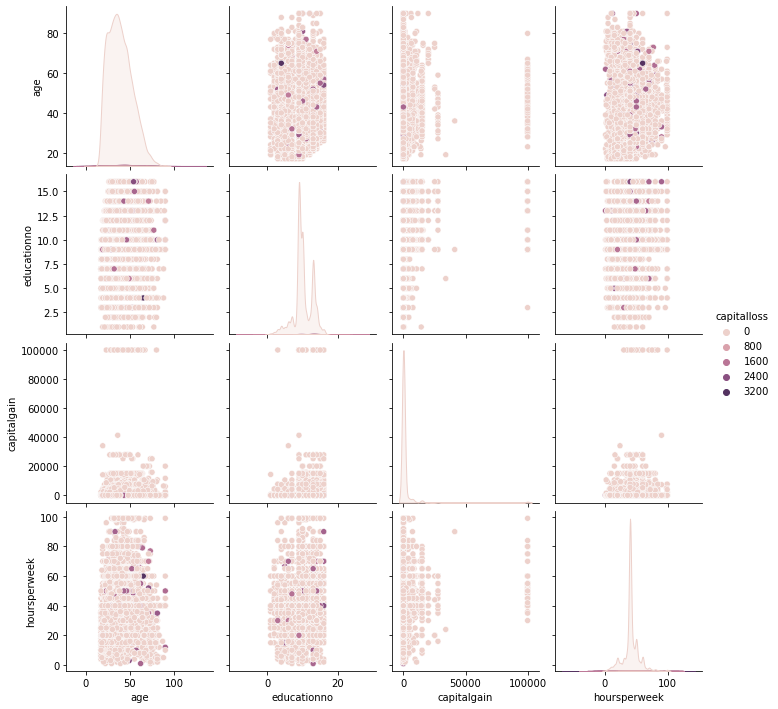

In [10]:
import seaborn as sns
sns.pairplot(salary, hue = "capitalloss")

In [11]:
import plotly.express as px
df = salary
fig = px.histogram(df, x="age", y="capitalgain", color="sex", marginal="rug",
                   hover_data=df.columns)
fig.show()

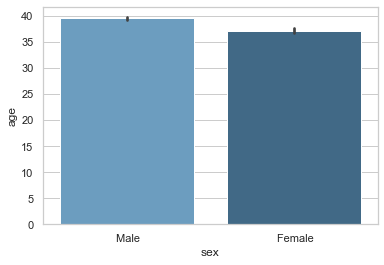

In [13]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="sex", y="age", data=salary, palette="Blues_d")

<AxesSubplot:>

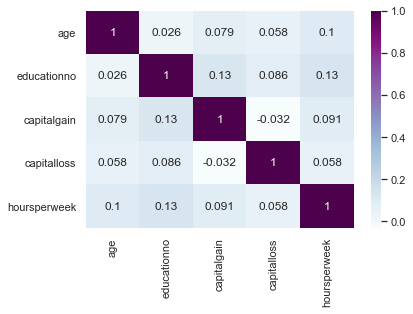

In [15]:
C = salary.corr()
sns.heatmap(C, annot= True, cmap = "BuPu")

Text(0, 0.5, 'workclass')

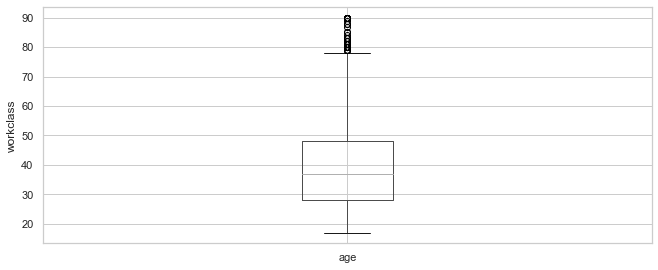

In [16]:
# draw boxplots to visualize outliers
import matplotlib.pyplot as plt 
plt.figure(figsize=(24,20))
plt.subplot(4, 2, 1)
fig = salary.boxplot(column='age')
fig.set_title('')
fig.set_ylabel('workclass')

Text(0, 0.5, 'workclass')

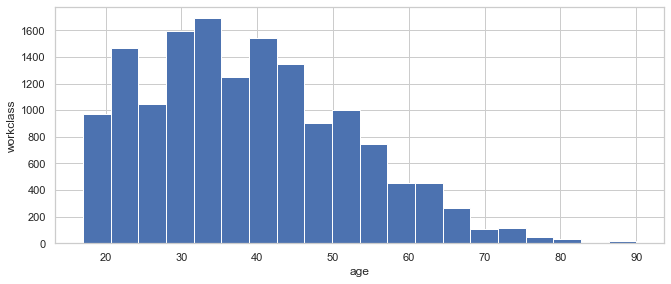

In [17]:

plt.figure(figsize=(24,20))
plt.subplot(4, 2, 1)
fig = salary['age'].hist(bins=20)
fig.set_xlabel('age')
fig.set_ylabel('workclass')

In [18]:
salary.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [19]:
from sklearn import preprocessing                      
label_encoder = preprocessing.LabelEncoder()

In [20]:
salary['Salary'] = label_encoder.fit_transform(salary['Salary'])
salary.Salary

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

In [21]:
objList = salary.select_dtypes(include = "object").columns
print (objList)

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native'],
      dtype='object')


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    salary[feat]=le.fit_transform(salary[feat].astype(str))
    
print(salary.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            15060 non-null  int64
 1   workclass      15060 non-null  int32
 2   education      15060 non-null  int32
 3   educationno    15060 non-null  int64
 4   maritalstatus  15060 non-null  int32
 5   occupation     15060 non-null  int32
 6   relationship   15060 non-null  int32
 7   race           15060 non-null  int32
 8   sex            15060 non-null  int32
 9   capitalgain    15060 non-null  int64
 10  capitalloss    15060 non-null  int64
 11  hoursperweek   15060 non-null  int64
 12  native         15060 non-null  int32
 13  Salary         15060 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 1.1 MB
None


In [24]:
X = salary.iloc[:,0:13]
Y = salary.iloc[:,13]

In [26]:
X

age  workclass  education  educationno  maritalstatus  occupation  \
0       25          2          1            7              4           6   
1       38          2         11            9              2           4   
2       28          1          7           12              2          10   
3       44          2         15           10              2           6   
4       34          2          0            6              4           7   
...    ...        ...        ...          ...            ...         ...   
15055   33          2          9           13              4           9   
15056   39          2          9           13              0           9   
15057   38          2          9           13              2           9   
15058   44          2          9           13              0           0   
15059   35          3          9           13              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  
0                 3     2    1            0            0            40      37  
1                 0     4    1            0            0            50      37  
2                 0     4    1            0            0            40      37  
3                 0     2    1         7688            0            40      37  
4                 1     4    1            0            0            30      37  
...             ...   ...  ...          ...          ...           ...     ...  
15055             3     4    1            0            0            40      37  
15056             1     4    0            0            0            36      37  
15057             0     4    1            0            0            50      37  
15058             3     1    1         5455            0            40      37  
15059             0     4    1            0            0            60      37  

[15060 rows x 13 columns]

In [27]:
Y 

# <=50K = 0
# >50K = 1

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

In [28]:
salary.Salary.value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [31]:
clf = SVC()
clf.fit(x_train , y_train)

SVC()

In [32]:
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy Score : ", acc)

Accuracy Score :  79.60159362549801


In [37]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[2739,   77],
       [ 691,  258]], dtype=int64)

<AxesSubplot:>

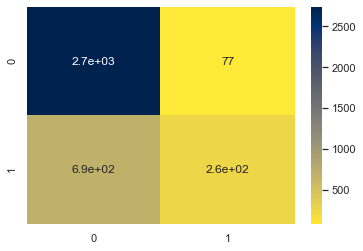

In [36]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, cmap= "cividis_r")

In [40]:
new_input = np.array([[28, 5, 1, 7,	 4, 7, 1, 4	, 1	, 0, 0,	30,	37]])
new_output = clf.predict(new_input)
new_output

array([0])

# Run SVM with Linear Kernel and C=1.0

In [44]:
X = salary.drop(['native'], axis=1)
y = salary['native']

In [45]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 

# fit classifier to training set
linear_svc.fit(X_train,y_train)

# make predictions on test set
y_pred_test=linear_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C = 1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)*100))

Model accuracy score with linear kernel and C = 1.0 : 91.5007


# Run SVM with RBF Kernel and C=100.0

In [52]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C = 100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score with rbf kernel and C = 100.0 : 89.6680


In [53]:
new_input1 = np.array([[28, 5, 1, 7,	 4, 7, 1, 4	, 1	, 0, 0,	30,	37]])
new_output1 = svc.predict(new_input)
new_output

array([0])